In [208]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Classification

In [209]:
library(ISLR)
names(Smarket)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [210]:
?Smarket

Smarket {ISLR},R Documentation


In [211]:
dim(Smarket)

[1] 1250    9

In [212]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

In [213]:
#cor(Smarket)

In [214]:
cor(Smarket[,-9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


The only substantial correlation is between Year and Volume. By plotting the data we see that Volume is increasing over time. In other words, the average number of shares traded daily increased from 2001 to 2005.

The following objects are masked from Smarket (pos = 4):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year


The following objects are masked from Smarket (pos = 8):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year


The following objects are masked from Smarket (pos = 10):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year




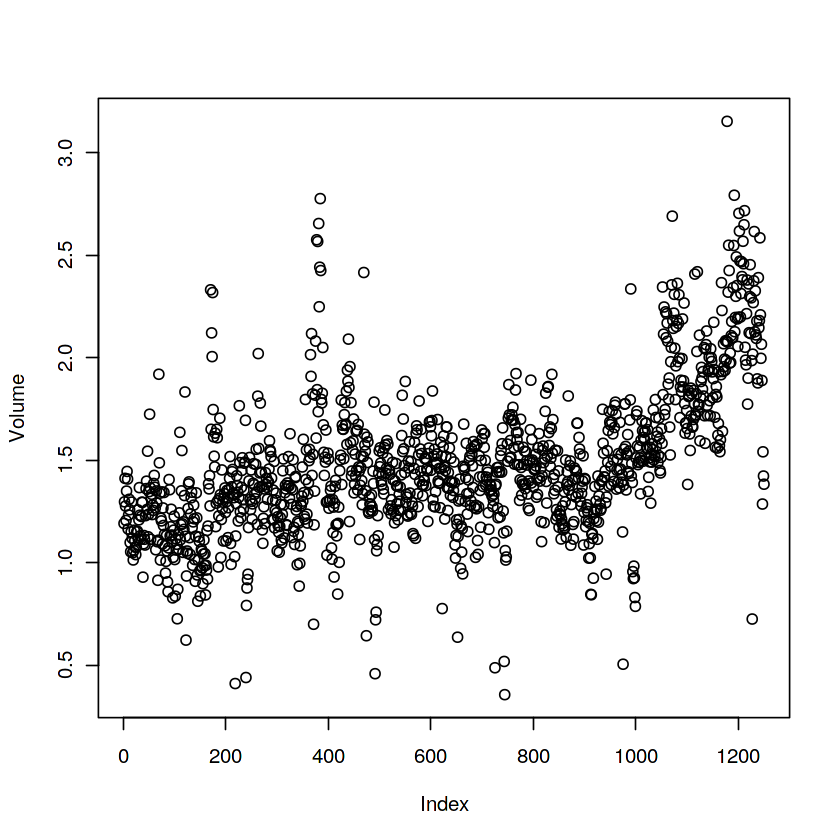

In [215]:
attach(Smarket)
plot(Volume)

# Logistic Regression

Next, we will fit a logistic regression model in order to predict Direction
using Lag1 through Lag5 and Volume. The glm() function fits generalized glm() linear models, a class of models that includes logistic regression. The syntax of the glm() function is similar to that of lm(), except that we must pass in the argument family=binomial in order to tell R to run a logistic regression rather than some other type of generalized linear model.

In [216]:
glm.fits=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,data=Smarket,family=binomial)
summary(glm.fits)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


The smallest p-value here is associated with Lag1. The negative coefficient for this predictor suggests that if the market had a positive return yesterday, then it is less likely to go up today. However, at a value of 0.15, the p-value is still relatively large, and so there is no clear evidence of a real association between Lag1 and Direction.


We use the coef() function in order to access just the coefficients for this fitted model. We can also use the summary() function to access particular aspects of the fitted model, such as the p-values for the coefficients.

In [217]:
coef(glm.fits)

(Intercept)         Lag1         Lag2         Lag3         Lag4         Lag5 
-0.126000257 -0.073073746 -0.042301344  0.011085108  0.009358938  0.010313068 
      Volume 
 0.135440659

In [218]:
summary(glm.fits)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-0.126000257,0.24073574,-0.5233966,0.6006983
Lag1,-0.073073746,0.05016739,-1.4565986,0.1452272
Lag2,-0.042301344,0.05008605,-0.8445733,0.3983491
Lag3,0.011085108,0.04993854,0.2219750,0.8243333
Lag4,0.009358938,0.04997413,0.1872757,0.8514445
Lag5,0.010313068,0.04951146,0.2082966,0.8349974
Volume,0.135440659,0.15835970,0.8552723,0.3924004


In [219]:
summary(glm.fits)$coef[,4]

(Intercept)        Lag1        Lag2        Lag3        Lag4        Lag5 
  0.6006983   0.1452272   0.3983491   0.8243333   0.8514445   0.8349974 
     Volume 
  0.3924004

The predict() function can be used to predict the probability that the market will go up, given values of the predictors. The type="response" option tells R to output probabilities of the form P(Y = 1|X), as opposed to other information such as the logit. If no data set is supplied to the predict() function, then the probabilities are computed for the training data that was used to fit the logistic regression model. Here we have printed only the first ten probabilities. We know that these values correspond to the probability of the market going up, rather than down, because the contrasts() function indicates that R has created a dummy variable with a 1 for Up.

In [220]:
glm.probs=predict(glm.fits,type="response")
glm.probs[1:10]

1         2         3         4         5         6         7         8 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812 0.5069565 0.4926509 0.5092292 
        9        10 
0.5176135 0.4888378

In [221]:
contrasts (Direction )

,Up
Down,0
Up,1


In order to make a prediction as to whether the market will go up or down on a particular day, we must convert these predicted probabilities into class labels, Up or Down. The following two commands create a vector of class predictions based on whether the predicted probability of a market increase is greater than or less than 0.5.

In [222]:
glm.pred=rep("Down",1250)
glm.pred[glm.probs >.5]="Up"

The first command creates a vector of 1,250 Down elements. The second line transforms to Up all of the elements for which the predicted probability of a market increase exceeds 0.5.

# Confusion matrix

Given these predictions, the table() function can be used to produce a confusion matrix in order to determine how many observations were correctly or incorrectly classified.

In [223]:
table(glm.pred,Direction)

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [224]:
# accuracy
mean(glm.pred==Direction )

[1] 0.5216

In [225]:
(507+145) /1250

[1] 0.5216

The diagonal elements of the confusion matrix indicate correct predictions, while the off-diagonals represent incorrect predictions. Hence our model correctly predicted that the market would go up on 507 days and that it would go down on 145 days, for a total of 507 + 145 = 652 correct predictions. The mean() function can be used to compute the fraction of days for which the prediction was correct. In this case, logistic regression correctly predicted the movement of the market 52.2 % of the time.
At first glance, it appears that the logistic regression model is working a little better than random guessing. However, this result is misleading because we trained and tested the model on the same set of 1, 250 observa- tions. In other words, 100 − 52.2 = 47.8 % is the training error rate. As we have seen previously, the training error rate is often overly optimistic—it tends to underestimate the test error rate. In order to better assess the ac- curacy of the logistic regression model in this setting, we can fit the model using part of the data, and then examine how well it predicts the held out data. This will yield a more realistic error rate, in the sense that in prac- tice we will be interested in our model’s performance not on the data that we used to fit the model, but rather on days in the future for which the market’s movements are unknown.

To implement this strategy, we will first create a vector corresponding to the observations from 2001 through 2004. We will then use this vector to create a held out data set of observations from 2005.

In [226]:
#data equal or less than 2005
train =( Year <2005)
Smarket.2005= Smarket [! train ,]
dim(Smarket.2005)

[1] 252   9

In [227]:
Smarket.2005

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
999,2005,-0.134,0.008,-0.007,0.715,-0.431,0.78690,-0.812,Down
1000,2005,-0.812,-0.134,0.008,-0.007,0.715,1.51080,-1.167,Down
1001,2005,-1.167,-0.812,-0.134,0.008,-0.007,1.72100,-0.363,Down
1002,2005,-0.363,-1.167,-0.812,-0.134,0.008,1.73890,0.351,Up
1003,2005,0.351,-0.363,-1.167,-0.812,-0.134,1.56910,-0.143,Down
1004,2005,-0.143,0.351,-0.363,-1.167,-0.812,1.47790,0.342,Up
1005,2005,0.342,-0.143,0.351,-0.363,-1.167,1.49040,-0.610,Down
1006,2005,-0.610,0.342,-0.143,0.351,-0.363,1.48880,0.398,Up
1007,2005,0.398,-0.610,0.342,-0.143,0.351,1.56210,-0.863,Down


In [228]:
Direction.2005=Direction[!train]

In [229]:
glm.fits=glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume , data=Smarket ,family=binomial,subset=train) #training on data before 2005
glm.probs=predict(glm.fits,Smarket.2005,type="response") #pred on 2005

In [230]:
glm.pred=rep("Down",252)
glm.pred[glm.probs >.5]="Up"

In [231]:
table(glm.pred,Direction.2005)

        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

In [232]:
mean(glm.pred==Direction.2005) # true Preductions

[1] 0.4801587

In [233]:
mean(glm.pred!=Direction.2005) # false Predictions or the test set error rate.

[1] 0.5198413

# Model with IV having significant p values

In [234]:
glm.fits=glm(Direction~Lag1+Lag2,data=Smarket ,family=binomial, subset=train)
glm.probs=predict(glm.fits,Smarket.2005,type="response")
glm.pred=rep("Down",252)
glm.pred[glm.probs >.5]="Up"
table(glm.pred,Direction.2005)

        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

In [235]:
mean(glm.pred==Direction.2005)

[1] 0.5595238

In [236]:
# predicting manually
predict(glm.fits,newdata=data.frame(Lag1=c(1.2,1.5),
Lag2=c(1.1,-0.8)),type="response")

1         2 
0.4791462 0.4960939

# Linear Discriminant Analysis

* It is used to plot 2D graph to understand the seperatibility between the two groups. So that we can make the best decision.
* It reduces dimensions like PCA , but it focuses on maximizing the seperatibility among known categories.

In R, we fit an LDA model using the lda() function, which is part of the MASS library. Notice that the syntax for the lda() function is identical to that of lm(), and to that of glm() except for the absence of the family option. We fit the model using only the observations before 2005.

In [237]:
library(MASS)
require(MASS)
lda.fit=lda(Direction~Lag1+Lag2,data=Smarket ,subset=train)
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

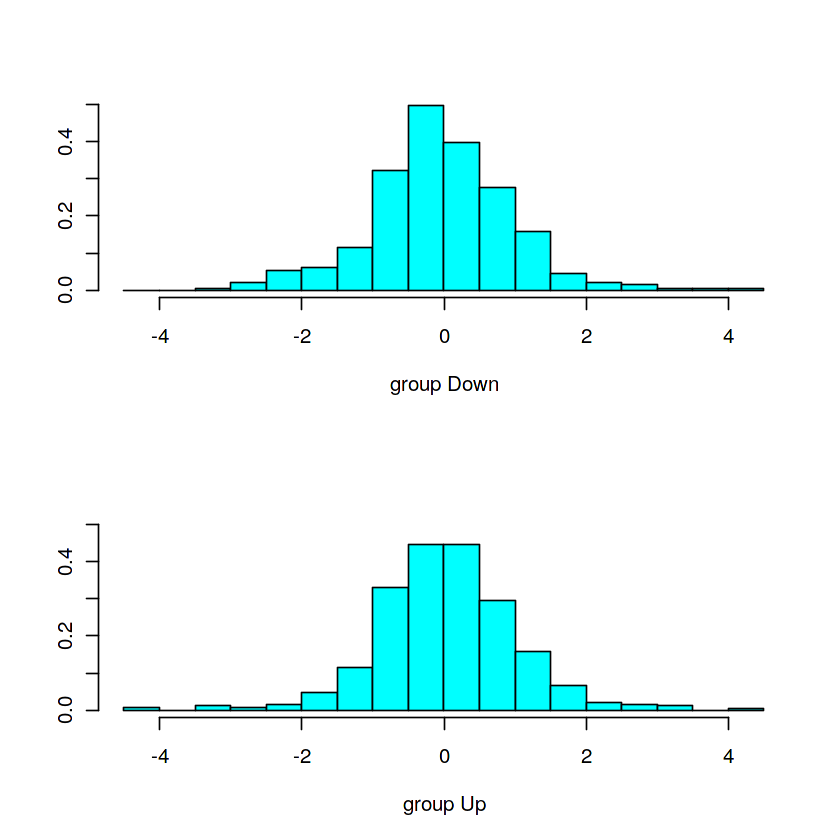

In [238]:
plot(lda.fit)

The LDA output indicates that πˆ1 = 0.492 and πˆ2 = 0.508; in other words, 49.2% of the training observations correspond to days during which the market went down.
The coefficients of linear discriminants output provides the linear combination of Lag1 and Lag2 that are used to form the LDA decision rule. In other words, these are the multipliers of the elements of X = x in (4.19). If −0.642 × Lag1 − 0.514 × Lag2 is large, then the LDA classifier will predict a market increase, and if it is small, then the LDA classifier will predict a market decline. The plot() function produces plots of the linear discriminants, obtained by computing −0.642 × Lag1 − 0.514 × Lag2 for each of the training observations.
The predict() function returns a list with three elements. The first ele- ment, class, contains LDA’s predictions about the movement of the market. The second element, posterior, is a matrix whose kth column contains the posterior probability that the corresponding observation belongs to the kth class, computed from (4.10). Finally, x contains the linear discriminants, described earlier.

In [239]:
lda.pred=predict(lda.fit, Smarket.2005)
names(lda.pred)

[1] "class"     "posterior" "x"

the LDA and logistic regression predictions are almost identical.

In [240]:
lda.class=lda.pred$class
table(lda.class ,Direction.2005)

         Direction.2005
lda.class Down  Up
     Down   35  35
     Up     76 106

In [241]:
mean(lda.class==Direction.2005)

[1] 0.5595238

# visualization tool using klaR package.

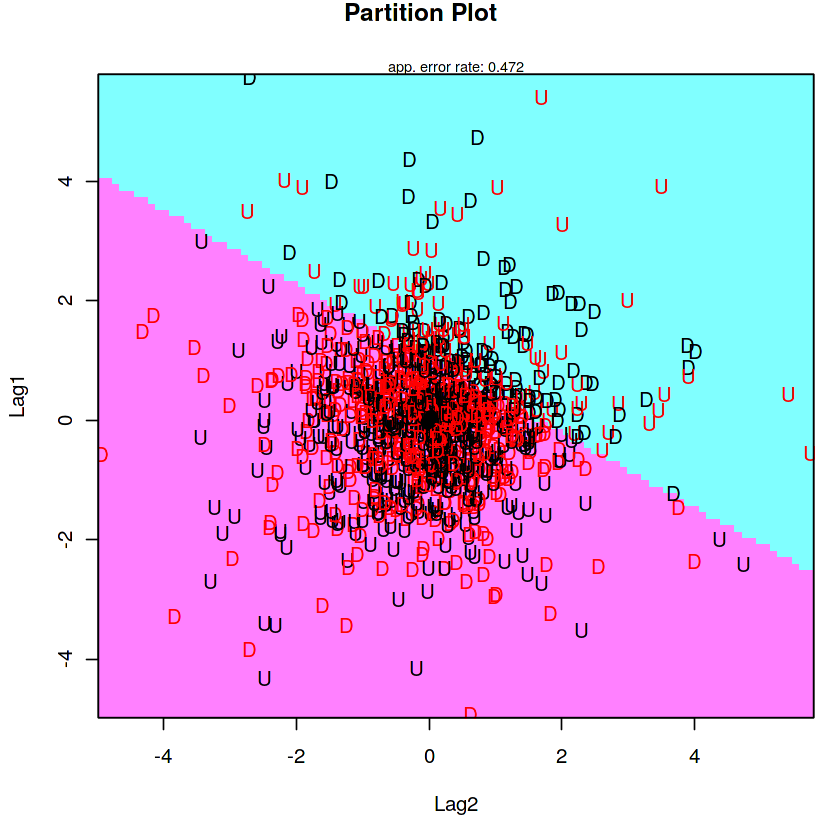

In [242]:
library(klaR)
partimat(Direction~Lag1+Lag2,data=Smarket, method = "lda")

# Checking Partition in all columns on category

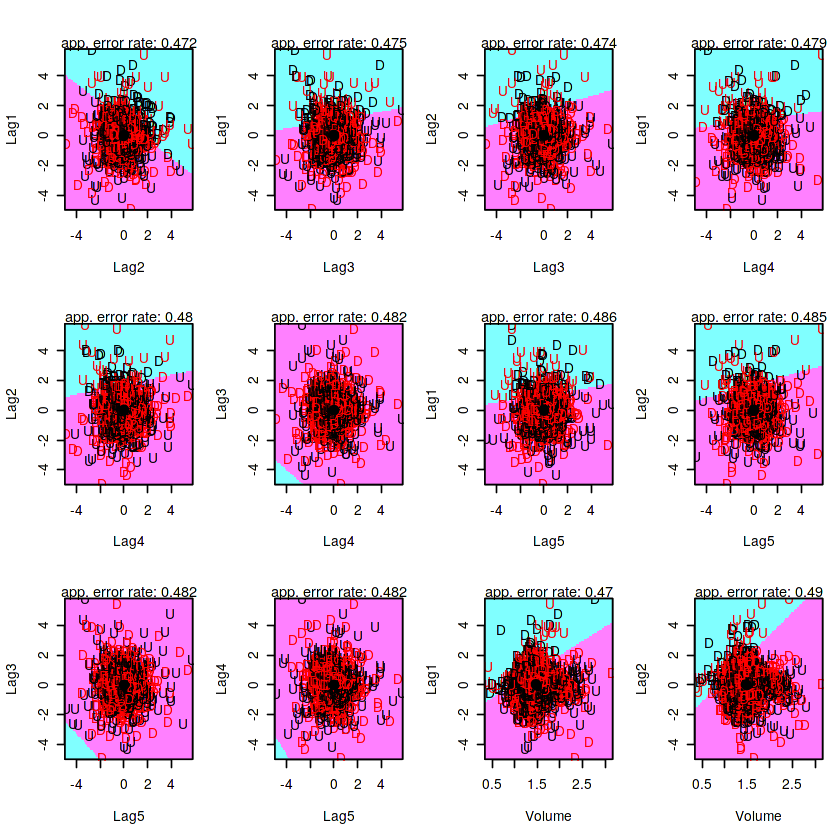

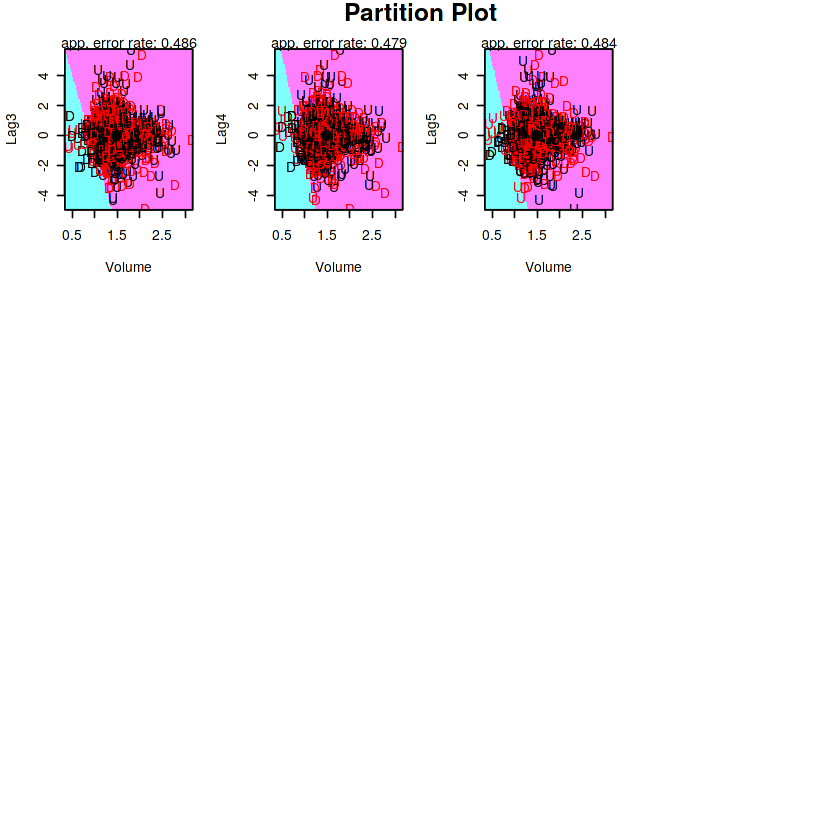

In [243]:
partimat(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume , data=Smarket, method = "lda")

# Quadratic Discriminant Analysis

QDA is implemented in R using the qda() function, which is also part of the MASS library. The qda() syntax is identical to that of lda().

In [244]:
qda.fit=qda(Direction~Lag1+Lag2,data=Smarket ,subset=train)
qda.fit

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

The output contains the group means. But it does not contain the coef- ficients of the linear discriminants, because the QDA classifier involves a quadratic, rather than a linear, function of the predictors. The predict() function works in exactly the same fashion as for LDA.

In [245]:
qda.class=predict(qda.fit,Smarket.2005)$class
table(qda.class ,Direction.2005)
mean(qda.class==Direction.2005)

         Direction.2005
qda.class Down  Up
     Down   30  20
     Up     81 121

[1] 0.5992063

Interestingly, the QDA predictions are accurate almost 60% of the time, even though the 2005 data was not used to fit the model. This level of accu- racy is quite impressive for stock market data, which is known to be quite hard to model accurately. This suggests that the quadratic form assumed by QDA may capture the true relationship more accurately than the linear forms assumed by LDA and logistic regression. However, we recommend evaluating this method’s performance on a larger test set before betting that this approach will consistently beat the market!

# K-Nearest Neighbors

We will now perform KNN using the knn() function, which is part of the class library. This function works rather differently from the other model- fitting functions that we have encountered thus far. Rather than a two-step approach in which we first fit the model and then we use the model to make predictions, knn() forms predictions using a single command. The function requires four inputs.
knn()

We use the cbind() function, short for column bind, to bind the Lag1 and Lag2 variables together into two matrices, one for the training set and the other for the test set.

In [246]:
library(class)
train.X=cbind(Lag1 ,Lag2)[train ,]
test.X=cbind(Lag1,Lag2)[!train,]
train.Direction =Direction[train]

Now the knn() function can be used to predict the market’s movement for the dates in 2005. We set a random seed before we apply knn() because if several observations are tied as nearest neighbors, then R will randomly break the tie. Therefore, a seed must be set in order to ensure reproducibil- ity of results.

In [247]:
set.seed (1)
knn.pred=knn(train.X,test.X,train.Direction ,k=1)
table(knn.pred,Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   43 58
    Up     68 83


The results using K = 1 are not very good, since only 50 % of the observa- tions are correctly predicted. Of course, it may be that K = 1 results in an overly flexible fit to the data. Below, we repeat the analysis using K = 3.

In [248]:
knn.pred=knn(train.X,test.X,train.Direction ,k=3)
table(knn.pred,Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   48 54
    Up     63 87

In [249]:
mean(knn.pred==Direction.2005)

[1] 0.5357143

The results have improved slightly. But increasing K further turns out to provide no further improvements. It appears that for this data, QDA provides the best results of the methods that we have examined so far.

# An Application to Caravan Insurance Data

In [250]:
dim(Caravan)

[1] 5822   86

In [251]:
?Caravan

Caravan {ISLR},R Documentation


In [252]:
names(Caravan)

[1] "MOSTYPE"  "MAANTHUI" "MGEMOMV"  "MGEMLEEF" "MOSHOOFD" "MGODRK"  
 [7] "MGODPR"   "MGODOV"   "MGODGE"   "MRELGE"   "MRELSA"   "MRELOV"  
[13] "MFALLEEN" "MFGEKIND" "MFWEKIND" "MOPLHOOG" "MOPLMIDD" "MOPLLAAG"
[19] "MBERHOOG" "MBERZELF" "MBERBOER" "MBERMIDD" "MBERARBG" "MBERARBO"
[25] "MSKA"     "MSKB1"    "MSKB2"    "MSKC"     "MSKD"     "MHHUUR"  
[31] "MHKOOP"   "MAUT1"    "MAUT2"    "MAUT0"    "MZFONDS"  "MZPART"  
[37] "MINKM30"  "MINK3045" "MINK4575" "MINK7512" "MINK123M" "MINKGEM" 
[43] "MKOOPKLA" "PWAPART"  "PWABEDR"  "PWALAND"  "PPERSAUT" "PBESAUT" 
[49] "PMOTSCO"  "PVRAAUT"  "PAANHANG" "PTRACTOR" "PWERKT"   "PBROM"   
[55] "PLEVEN"   "PPERSONG" "PGEZONG"  "PWAOREG"  "PBRAND"   "PZEILPL" 
[61] "PPLEZIER" "PFIETS"   "PINBOED"  "PBYSTAND" "AWAPART"  "AWABEDR" 
[67] "AWALAND"  "APERSAUT" "ABESAUT"  "AMOTSCO"  "AVRAAUT"  "AAANHANG"
[73] "ATRACTOR" "AWERKT"   "ABROM"    "ALEVEN"   "APERSONG" "AGEZONG" 
[79] "AWAOREG"  "ABRAND"   "AZEILPL"  "APLEZIER" "AFIETS"   "AINBOED" 
[85] "ABYSTAND" "Purchase"

In [253]:
attach(Caravan)
summary(Purchase)

The following objects are masked from Caravan (pos = 4):

    AAANHANG, ABESAUT, ABRAND, ABROM, ABYSTAND, AFIETS, AGEZONG,
    AINBOED, ALEVEN, AMOTSCO, APERSAUT, APERSONG, APLEZIER, ATRACTOR,
    AVRAAUT, AWABEDR, AWALAND, AWAOREG, AWAPART, AWERKT, AZEILPL,
    MAANTHUI, MAUT0, MAUT1, MAUT2, MBERARBG, MBERARBO, MBERBOER,
    MBERHOOG, MBERMIDD, MBERZELF, MFALLEEN, MFGEKIND, MFWEKIND,
    MGEMLEEF, MGEMOMV, MGODGE, MGODOV, MGODPR, MGODRK, MHHUUR, MHKOOP,
    MINK123M, MINK3045, MINK4575, MINK7512, MINKGEM, MINKM30, MKOOPKLA,
    MOPLHOOG, MOPLLAAG, MOPLMIDD, MOSHOOFD, MOSTYPE, MRELGE, MRELOV,
    MRELSA, MSKA, MSKB1, MSKB2, MSKC, MSKD, MZFONDS, MZPART, PAANHANG,
    PBESAUT, PBRAND, PBROM, PBYSTAND, PFIETS, PGEZONG, PINBOED, PLEVEN,
    PMOTSCO, PPERSAUT, PPERSONG, PPLEZIER, PTRACTOR, Purchase, PVRAAUT,
    PWABEDR, PWALAND, PWAOREG, PWAPART, PWERKT, PZEILPL


The following objects are masked from Caravan (pos = 6):

    AAANHANG, ABESAUT, ABRAND, ABROM, ABYSTAND, AFIETS, AGEZONG,
    

No  Yes 
5474  348

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale. For instance, imagine a data set that contains two variables, salary and age (measured in dollars and years, respectively). As far as KNN is concerned, a difference of $1,000 in salary is enormous compared to a difference of 50 years in age.

In [254]:
standardized.X=scale(Caravan [,-86])

In [255]:
ls()

[1] "auth"                      "Direction.2005"           
 [3] "get_user_secret"           "GET_USER_SECRET_ENDPOINT" 
 [5] "glm.fits"                  "glm.pred"                 
 [7] "glm.probs"                 "KAGGLE_BASE_URL"          
 [9] "KAGGLE_IAP_TOKEN"          "KAGGLE_USER_SECRETS_TOKEN"
[11] "knn.pred"                  "lda.class"                
[13] "lda.fit"                   "lda.pred"                 
[15] "qda.class"                 "qda.fit"                  
[17] "Smarket.2005"              "standardized.X"           
[19] "test"                      "test.X"                   
[21] "test.Y"                    "TokenBigQueryKernel"      
[23] "train"                     "train.Direction"          
[25] "train.X"                   "train.Y"

In [256]:
objects(2)

[1] "AAANHANG" "ABESAUT"  "ABRAND"   "ABROM"    "ABYSTAND" "AFIETS"  
 [7] "AGEZONG"  "AINBOED"  "ALEVEN"   "AMOTSCO"  "APERSAUT" "APERSONG"
[13] "APLEZIER" "ATRACTOR" "AVRAAUT"  "AWABEDR"  "AWALAND"  "AWAOREG" 
[19] "AWAPART"  "AWERKT"   "AZEILPL"  "MAANTHUI" "MAUT0"    "MAUT1"   
[25] "MAUT2"    "MBERARBG" "MBERARBO" "MBERBOER" "MBERHOOG" "MBERMIDD"
[31] "MBERZELF" "MFALLEEN" "MFGEKIND" "MFWEKIND" "MGEMLEEF" "MGEMOMV" 
[37] "MGODGE"   "MGODOV"   "MGODPR"   "MGODRK"   "MHHUUR"   "MHKOOP"  
[43] "MINK123M" "MINK3045" "MINK4575" "MINK7512" "MINKGEM"  "MINKM30" 
[49] "MKOOPKLA" "MOPLHOOG" "MOPLLAAG" "MOPLMIDD" "MOSHOOFD" "MOSTYPE" 
[55] "MRELGE"   "MRELOV"   "MRELSA"   "MSKA"     "MSKB1"    "MSKB2"   
[61] "MSKC"     "MSKD"     "MZFONDS"  "MZPART"   "PAANHANG" "PBESAUT" 
[67] "PBRAND"   "PBROM"    "PBYSTAND" "PFIETS"   "PGEZONG"  "PINBOED" 
[73] "PLEVEN"   "PMOTSCO"  "PPERSAUT" "PPERSONG" "PPLEZIER" "PTRACTOR"
[79] "Purchase" "PVRAAUT"  "PWABEDR"  "PWALAND"  "PWAOREG"  "PWAPART" 
[85] "PWERKT"   "PZEILPL"

In [257]:
var ( Caravan [ ,2])
var ( Caravan [ ,1])

[1] 0.1647078

[1] 165.0378

We now split the observations into a test set, containing the first 1,000 observations, and a training set, containing the remaining observations. We fit a KNN model on the training data using K = 1, and evaluate its performance on the test data.

In [258]:
test =1:1000
train.X=standardized.X[-test ,]
test.X=standardized.X[test ,]
train.Y=Purchase [-test]
test.Y=Purchase [test]
set.seed (1)
knn.pred=knn(train.X,test.X,train.Y,k=1)
mean(test.Y!=knn.pred)
mean(test.Y!="No")

[1] 0.118

[1] 0.059

In [259]:
table(knn.pred,test.Y)

        test.Y
knn.pred  No Yes
     No  873  50
     Yes  68   9

Using K = 3, the success rate increases to 19 %, and with K = 5 the rate is 26.7 %. This is over four times the rate that results from random guessing. It appears that KNN is finding some real patterns in a difficult data set!

In [260]:
knn.pred=knn(train.X,test.X,train.Y,k=3)
table(knn.pred,test.Y)

        test.Y
knn.pred  No Yes
     No  920  54
     Yes  21   5

In [261]:
knn.pred=knn(train.X,test.X,train.Y,k=5)
table(knn.pred,test.Y)

        test.Y
knn.pred  No Yes
     No  930  55
     Yes  11   4


As a comparison, we can also fit a logistic regression model to the data. If we use 0.5 as the predicted probability cut-off for the classifier, then we have a problem: only seven of the test observations are predicted to purchase insurance. Even worse, we are wrong about all of these! However, we are not required to use a cut-off of 0.5. If we instead predict a purchase any time the predicted probability of purchase exceeds 0.25, we get much better results: we predict that 33 people will purchase insurance, and we are correct for about 33% of these people. This is over five times better than random guessing!

In [262]:
glm.fits=glm(Purchase~.,data=Caravan ,family=binomial, subset=-test)
glm.probs=predict(glm.fits,Caravan[test,],type="response")
glm.pred=rep("No",1000)
glm.pred[glm.probs >.5]="Yes"
table(glm.pred,test.Y)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


        test.Y
glm.pred  No Yes
     No  934  59
     Yes   7   0

In [263]:
glm.pred=rep("No",1000)
glm.pred[glm.probs >.25]=" Yes"
table(glm.pred,test.Y)

        test.Y
glm.pred  No Yes
     Yes  22  11
    No   919  48